Using 'DeepFashion' Dataset for Test Purposes: (Category and Attribute Prediction Benchmark)

- https://mmlab.ie.cuhk.edu.hk/projects/DeepFashion.html


DISC2021 Image Similarity Dataset:
- https://sites.google.com/view/isc2021/dataset

**Show image embeddings of a file of images with T-SNE Visualization (CLIP Embedding)**

*1- Load and Preprocess Images*

In [21]:
import os
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Directory containing images
image_dir = 'test_images_fashion'

# Load and preprocess images
def load_images(image_dir):
    image_list = []
    file_names = []
    for filename in os.listdir(image_dir):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(image_dir, filename)
            img = Image.open(img_path).convert("RGB")
            image_list.append(img)
            file_names.append(filename)
    return image_list, file_names

images, file_names = load_images(image_dir)

# Display number of loaded images
print(f"Loaded {len(images)} images.")


Loaded 232 images.


*2 (Alternative)- Extract Embeddings Using CLIP*

In [22]:
import os
import numpy as np
import torch
import clip
from PIL import Image
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load pre-trained CLIP model
device = "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# Extract embeddings using CLIP
def get_embeddings(model, preprocess, images):
    image_tensors = [preprocess(img).unsqueeze(0).to(device) for img in images]
    image_features = []
    with torch.no_grad():
        for image_tensor in image_tensors:
            image_features.append(model.encode_image(image_tensor))
    embeddings = torch.cat(image_features).numpy()
    return embeddings

embeddings = get_embeddings(model, preprocess, images)
print("Embeddings shape:", embeddings.shape)

Embeddings shape: (232, 512)


*3- Calculate Embedding Similarity*

In [23]:
# Calculate cosine similarity
similarity_matrix = np.dot(embeddings, embeddings.T)

*4- Do Visualization*

/Users/busraoguzoglu/PycharmProjects/ImageSimilarity/.venv/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


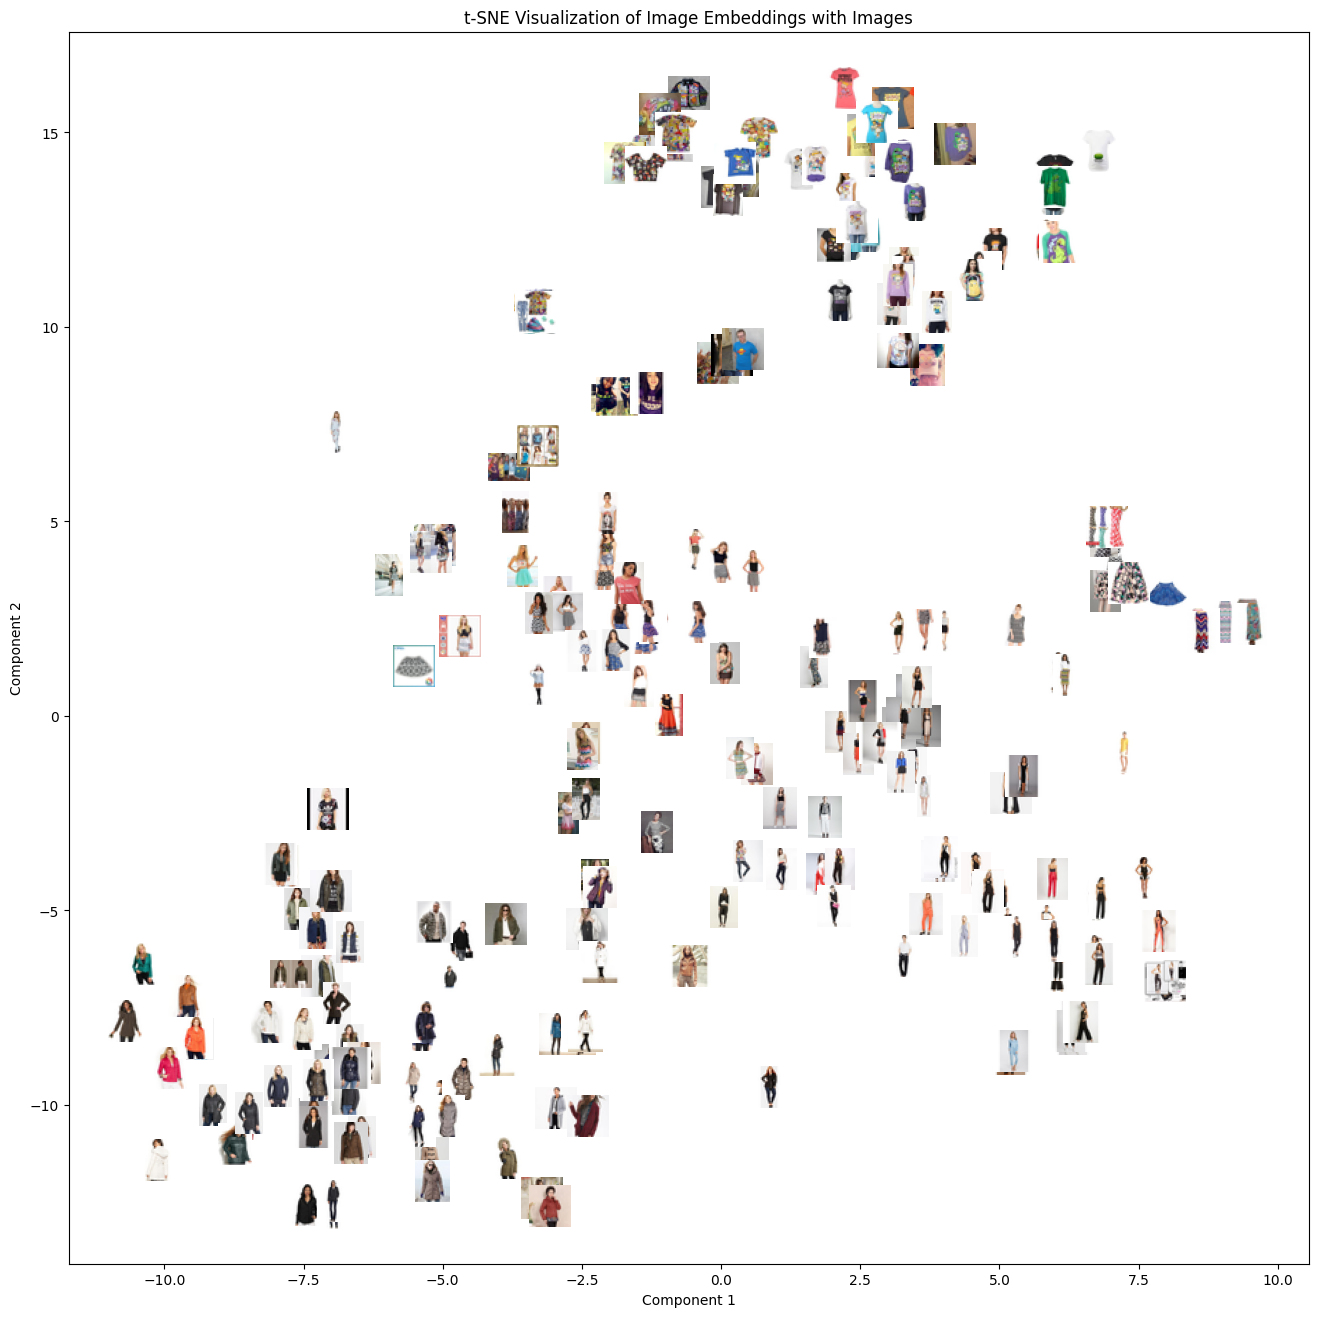

In [24]:
# Function to visualize using t-SNE with images
def visualize_embeddings_with_images(embeddings, images, tsne_results):
    fig, ax = plt.subplots(figsize=(16, 16))
    ax.scatter(tsne_results[:, 0], tsne_results[:, 1], s=0)  # Scatter plot to set the limits
    
    for i, (x, y) in enumerate(tsne_results):
        img = images[i]
        img.thumbnail((30, 30), Image.LANCZOS)  # Resize image to smaller size
        img = np.array(img)
        if img.shape[2] == 4:  # Convert RGBA to RGB if necessary
            img = img[:, :, :3]
        
        imagebox = OffsetImage(img, zoom=1)
        ab = AnnotationBbox(imagebox, (x, y), frameon=False)
        ax.add_artist(ab)
    
    plt.title('t-SNE Visualization of Image Embeddings with Images')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

# Apply t-SNE to embeddings
tsne = TSNE(n_components=2, perplexity=15, n_iter=300)
tsne_results = tsne.fit_transform(embeddings)

# Replace with the path to your images directory
visualize_embeddings_with_images(embeddings, images, tsne_results)